In [975]:
import requests
import json
import pandas as pd
import numpy as np

In [1143]:
#CSV personajes

    
characters_csv = pd.read_csv('character-deaths.csv')
print(characters_csv.columns)
print(len(characters_csv))
characters_csv = characters_csv[['Name', 'Book of Death', 'Gender', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD' ]]
characters_csv.head


Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')
917


<bound method NDFrame.head of                         Name  Book of Death  Gender  GoT  CoK  SoS  FfC  DwD
0             Addam Marbrand            NaN       1    1    1    1    1    0
1    Aegon Frey (Jinglebell)            3.0       1    0    0    1    0    0
2            Aegon Targaryen            NaN       1    0    0    0    0    1
3              Adrack Humble            5.0       1    0    0    0    0    1
4             Aemon Costayne            NaN       1    0    0    1    0    0
..                       ...            ...     ...  ...  ...  ...  ...  ...
912                    Zollo            NaN       1    0    0    1    0    0
913        Yurkhaz zo Yunzak            5.0       1    0    0    0    0    1
914         Yezzan Zo Qaggaz            5.0       1    0    0    0    0    1
915         Torwynd the Tame            5.0       1    0    0    1    0    0
916            Talbert Serry            4.0       1    0    0    0    1    0

[917 rows x 8 columns]>

In [1144]:
#API personajes libros
url_book_char = "https://api.got.show/api/book/characters"
response_book_char = requests.get(url_book_char)
characters_book_char = response_book_char.json()
charactersDF = pd.DataFrame(characters_book_char)
print(charactersDF.columns)
print(len(charactersDF))
characters_df = charactersDF[['name','books', 'gender', 'house', 'alive', 'id']].rename(columns={'name':'Name'})


Index(['titles', 'spouse', 'children', 'allegiance', 'books', 'plod',
       'longevity', 'plodB', 'plodC', 'longevityB', 'longevityC', '_id',
       'name', 'slug', 'gender', 'culture', 'house', 'alive', 'createdAt',
       'updatedAt', '__v', 'pagerank', 'id', 'image', 'birth', 'placeOfDeath',
       'death', 'placeOfBirth', 'longevityStartB', 'father', 'mother', 'heir'],
      dtype='object')
2048


In [1145]:
#DF de personajes (API+CSV)
characters_DF = pd.merge_ordered(characters_df,characters_csv, on='Name')
print(len(characters_DF))
characters_DF.head(20)

2102


,Name,books,gender,house,alive,id,Book of Death,Gender,GoT,CoK,SoS,FfC,DwD
0,Abelar Hightower,[The Hedge Knight],male,House Hightower,True,5cc08e61888dfb00103cd5e9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Addam,[],None,NaN,True,5cc08e61888dfb00103cd5ea,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Addam Frey,[The Mystery Knight],male,House Frey,True,5cc08e61888dfb00103cd5eb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Addam Marbrand,"[A Game of Thrones, A Clash of Kings, A Storm ...",male,House Marbrand[3],True,5cc08e61888dfb00103cd5ec,NaN,1.0,1.0,1.0,1.0,1.0,0.0
4,Addam Osgrey,[The Sworn Sword],male,House Osgrey[1],False,5cc08e61888dfb00103cd5ed,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Addam Velaryon,"[The World of Ice & Fire, Fire & Blood, The Pr...",male,House Velaryon,False,5cc08e61888dfb00103cd5ee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Addison Hill,"[The World of Ice & Fire, Fire & Blood, A Feas...",male,House Swyft[1],True,5cc08e61888dfb00103cd5ef,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Adrack Humble,NaN,NaN,NaN,NaN,NaN,5.0,1.0,0.0,0.0,0.0,0.0,1.0
8,Aegon Blackfyre,"[The World of Ice & Fire, The Sworn Sword, The...",male,House Blackfyre[1],False,5cc08e61888dfb00103cd5f0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Aegon Frey (Jinglebell),NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1146]:
#comparamos las columnas de genero para sacar vaores claros
print(characters_DF['gender'].value_counts())
print(characters_DF['Gender'].value_counts())

male      1356
female     315
Name: gender, dtype: int64
1.0    760
0.0    157
Name: Gender, dtype: int64


In [1147]:
#hacemos un DF solo con los generos y las juntamos
def genderChange(newcol):
    characters_DF[['gender', 'Gender']] = characters_DF[['gender', 'Gender']].fillna('-')
    characters_DF['Gender'].dtype
    char_gender = characters_DF[['gender', 'Gender']]

    def genderJoin(rowSeries):
        return  rowSeries.gender + str(rowSeries.Gender)
    
    characters_DF[newcol] = char_gender.apply(genderjoin, axis=1)
    return characters_DF
    

In [1149]:
#aplicamos la funcion de unir ambas columnas creando una nueva:'Genero'
def genderJoin(rowSeries):
    return  rowSeries.gender + str(rowSeries.Gender)
characters_DF['Genero'] = char_gender.apply(genderJoin, axis=1)

In [1150]:
#volvemos a cambiar nuestro DF de pesonajes para quedarnos solo con las columnas que nos interesan
characters_DF = characters_DF[['Name', 'house', 'Genero', 'alive', 'Book of Death', 'books','id']]

In [1151]:
#seguimos con los valores de 'Genero' para ver como podemos limpiarlo
characters_DF.Genero.value_counts()

male-        715
male1.0      625
--           290
female-      180
-1.0         116
female0.0    116
-0.0          25
female1.0     19
male0.0       16
Name: Genero, dtype: int64

In [1152]:
#cambiamos los valores de genero por otros mas concretos coon a funcion generoOK():
def generoOK(m,f,u):
    male=['male-','male1.0', '-1.0']
    female=['female-','female0.0', '-0.0']
    unknown=['--','female1.0','male0.0']
    for x,y,z in male,female,unknown:
        characters_DF.Genero = characters_DF.Genero.replace({x:m , y:f, z:u})
generoOK('Male','Female','Unknown')

In [1153]:
#comprobamos que los vaores son correctos
characters_DF['Genero'].value_counts()

Male       1185
Female      760
Unknown     157
Name: Genero, dtype: int64

In [1154]:
#Pasamos a limpiar la columna 'house' de cada personaje
characters_DF['house'] = characters_DF['house'].replace(regex={r'(&apos;)':"'",r'(\[\d\])':''}).fillna('Without')
characters_DF.house.unique()#estan todos limpios


array(['House Hightower', 'Without', 'House Frey', 'House Marbrand',
       'House Osgrey', 'House Velaryon', 'House Swyft', 'House Blackfyre',
       'House Targaryen', 'House Bracken', 'House Penrose', 'House Arryn',
       'House Costayne', 'House Estermont', 'House Greyjoy',
       "Night's Watch", 'The Citadel', 'Faith of the Seven',
       'House Wynch', "Chataya's brothel",
       'House Royce of the Gates of the Moon', 'House Stark',
       'House Florent', 'Band of Nine', 'House Staedmon',
       'House Norcross', 'House Oakheart', 'House Tyrell',
       "City Watch of King's Landing", 'House Seaworth', 'House Thorne',
       'House Dayne', 'House Sharp', 'House Graceford', 'House Ambrose',
       'House Cockshaw', 'House Connington', 'House Haigh', 'House Hunt',
       'House Stackspear', 'House Karstark', 'House Mormont',
       'House Bulwer', 'House Lefford', 'House Blackwood', 'House Whent',
       'House Crakehall', 'House Butterwell', 'House Lorch',
       'House Royce'

In [1155]:
#como el 60% de las casas solo estan asociadas a dos personajes vamos a juntarlas todas en un valor unico

characters_DF.house.value_counts().min()
print(np.percentile(characters_DF.house.value_counts(),60))

2.0


In [1156]:
#no se como seguir 
characters_DF.groupby('house').agg({'house':'count'})





,house
house,
Alchemists' Guild,7
Antler Men,1
Band of Nine,1
Black Ears,2
Blacks,2
...,...
sea watch,1
the Brave Companions,1
the Peach,1


In [1157]:
#DF houses
url_book_house = 'https://api.got.show/api/book/houses'
response_book_houses = requests.get(url_book_house)
houses_book = response_book_houses.json()
book_housesDF = pd.DataFrame(houses_book)
book_housesDF=book_housesDF[['_id','name','region','overlords']]
book_housesDF.shape
    

(590, 4)

In [1158]:
book_housesDF['region'] = book_housesDF['region'].fillna('Unknown')

In [1159]:
book_housesDF[book_housesDF['name']=='House Frey']

,_id,name,region,overlords
42,5cc08102888dfb00103ccbc5,House Frey,Riverlands,"[House Tully, House Baelish]"


In [1160]:
def regionName():
    regions={
        'The Vale':['Vale of Arryn','Vale','The Vale', 'the Vale', 'The Vale of Arryn'],
        'The North':['North', 'north','The North'],
        'The Reach':['Reach','the Reach','The Reach'],
        'Riverlands':['Riverlands','riverlands'],
        'Westerlands':['Westerlands','westerlands','The Westerlands','the Westerlands'],
        'Crownlands':['Crownlands','crownlands'],
        'Stormlands':['stormlands','Stormlands','The Stormlands','the Stormlands'],
        'Unknown':['']
        }  
    for item in regions.items():
        key=item[0]
        for oldname in item[1]:
            book_housesDF['region']=book_housesDF['region'].replace(oldname,key)

regionName()

In [1161]:
book_housesDF['region'].unique()

array(['Riverlands', 'The North', 'Westerlands', 'Dorne', 'The Vale',
       'The Reach', 'Stormlands', 'Crownlands', 'Iron Islands', 'Unknown',
       'Blackwater Bay', 'Shield Islands', 'Three Sisters', 'Westeros',
       'Meereen', 'Wall', 'Lys', 'Braavos', 'Red Flower Vale',
       'Sweet Lotus Vale', 'Koj', 'Summer Isles', 'Valyria'], dtype=object)

In [1162]:
book_housesDF[book_housesDF['region']=='Unknown']['name']

21                          House Brune
78                          House Vance
80     House Vance from Wayfarer's Rest
127                         House Flint
132                      House Fossoway
                     ...               
580                         Mouse House
581              Mermaid (pillow house)
587                     House Whitfield
588                       House Warrick
589                        House Groves
Name: name, Length: 120, dtype: object

In [1167]:
characters_DF.head()

,Name,house,Genero,alive,Book of Death,books,id
0,Abelar Hightower,House Hightower,Male,Yes,0.0,[The Hedge Knight],5cc08e61888dfb00103cd5e9
1,Addam,Without,Male,Yes,0.0,[],5cc08e61888dfb00103cd5ea
2,Addam Frey,House Frey,Male,Yes,0.0,[The Mystery Knight],5cc08e61888dfb00103cd5eb
3,Addam Marbrand,House Marbrand,Female,Yes,0.0,"[A Game of Thrones, A Clash of Kings, A Storm ...",5cc08e61888dfb00103cd5ec
4,Addam Osgrey,House Osgrey,Male,No,0.0,[The Sworn Sword],5cc08e61888dfb00103cd5ed


In [1168]:
characters_DF['Book of Death'] = characters_DF['Book of Death'].fillna(0)
characters_DF['alive'] = characters_DF['alive'].astype(str).replace({'True':'Yes','False':'No','nan':'Unknown'})

In [1169]:
characters_DF['alive'].value_counts()

Yes        1539
No          510
Unknown      53
Name: alive, dtype: int64

In [1170]:
characters_DF['Book of Death'].value_counts()

0.0    1795
3.0      97
2.0      73
5.0      61
1.0      49
4.0      27
Name: Book of Death, dtype: int64

In [1171]:
characters_alive = characters_DF[(characters_DF['alive']=='Yes') & (characters_DF['Book of Death']==0)]
characters_alive

,Name,house,Genero,alive,Book of Death,books,id
0,Abelar Hightower,House Hightower,Male,Yes,0.0,[The Hedge Knight],5cc08e61888dfb00103cd5e9
1,Addam,Without,Male,Yes,0.0,[],5cc08e61888dfb00103cd5ea
2,Addam Frey,House Frey,Male,Yes,0.0,[The Mystery Knight],5cc08e61888dfb00103cd5eb
3,Addam Marbrand,House Marbrand,Female,Yes,0.0,"[A Game of Thrones, A Clash of Kings, A Storm ...",5cc08e61888dfb00103cd5ec
6,Addison Hill,House Swyft,Male,Yes,0.0,"[The World of Ice & Fire, Fire & Blood, A Feas...",5cc08e61888dfb00103cd5ef
...,...,...,...,...,...,...,...
2097,Zekko,Without,Male,Yes,0.0,[A Dance with Dragons],5cc08e61888dfb00103cdde4
2098,Zharaq zo Loraq,House of Loraq,Male,Yes,0.0,[A Dance with Dragons],5cc08e61888dfb00103cdde5
2099,Zhoe Blanetree,House Blanetree,Male,Yes,0.0,"[A Clash of Kings, A Storm of Swords, A Feast ...",5cc08e61888dfb00103cdde6
2100,Zia Frey,House Frey,Male,Yes,0.0,"[A Clash of Kings, A Storm of Swords, A Feast ...",5cc08e61888dfb00103cdde7


In [1172]:
dead_characters = characters_DF[(characters_DF['alive']!='Yes') | (characters_DF['Book of Death']!=0)]

In [1173]:
dead_characters.head()

,Name,house,Genero,alive,Book of Death,books,id
4,Addam Osgrey,House Osgrey,Male,No,0.0,[The Sworn Sword],5cc08e61888dfb00103cd5ed
5,Addam Velaryon,House Velaryon,Male,No,0.0,"[The World of Ice & Fire, Fire & Blood, The Pr...",5cc08e61888dfb00103cd5ee
7,Adrack Humble,Without,Unknown,Unknown,5.0,NaN,NaN
8,Aegon Blackfyre,House Blackfyre,Male,No,0.0,"[The World of Ice & Fire, The Sworn Sword, The...",5cc08e61888dfb00103cd5f0
9,Aegon Frey (Jinglebell),Without,Unknown,Unknown,3.0,NaN,NaN


In [1175]:
dead_characters.groupby('house').agg({'Book of Death':'count'}).head()

,Book of Death
house,
Alchemists' Guild,1
Band of Nine,1
Blacks,1
Brave Companions,7
Brotherhood without banners,1


In [1177]:
dead_characters[(dead_characters['house']=='House Lannister')]

,Name,house,Genero,alive,Book of Death,books,id
420,Damon Lannister (lord),House Lannister,Male,No,0.0,"[The World of Ice & Fire, The Hedge Knight, Th...",5cc08e61888dfb00103cd782
656,Gerion Lannister,House Lannister,Male,No,0.0,"[The World of Ice & Fire, A Game of Thrones, A...",5cc08e61888dfb00103cd869
660,Gerold Lannister,House Lannister,Male,No,0.0,"[The World of Ice & Fire, The Sworn Sword, A S...",5cc08e61888dfb00103cd86d
883,Jason Lannister,House Lannister,Male,No,0.0,"[The World of Ice & Fire, Fire and Blood, The ...",5cc08e61888dfb00103cd949
916,Joanna Lannister,House Lannister,Male,No,0.0,"[The World of Ice & Fire, A Game of Thrones, A...",5cc08e61888dfb00103cd96a
978,Jyck,House Lannister,Female,No,1.0,[A Game of Thrones],5cc08e61888dfb00103cd9a8
993,Kevan Lannister,House Lannister,Female,No,5.0,"[The World of Ice & Fire, A Game of Thrones, A...",5cc08e61888dfb00103cd9b6
1296,Morrec,House Lannister,Female,No,1.0,[A Game of Thrones],5cc08e61888dfb00103cdad5
1721,Senelle,House Lannister,Unknown,No,4.0,[A Feast for Crows],5cc08e61888dfb00103cdc73
1768,Stafford Lannister,House Lannister,Male,No,0.0,"[A Game of Thrones, A Clash of Kings, A Storm ...",5cc08e61888dfb00103cdca0


In [1178]:
dead_characters[(dead_characters['house']=='House Tully')].shape[0]


7

In [1179]:
def death_house(house,book):
    books={
        0:'Before the books',
        1:'A Game of Thrones',
        2:'A Clash of Kings',
        3:'A Storm of Swords',
        4:'A Feast for Crows',
        5:'A Dance with Dragons'
    }
    for libro in books.items():
        if libro[0] == book:
            titulo=libro[1]
    numero_muertos = dead_characters[(dead_characters['house']==house) & (dead_characters['Book of Death']==book)].shape[0]
    gente_casa = characters_DF[(characters_DF['house']==house)].shape[0]
    porc_muertes = int((numero_muertos/gente_casa)*100)
    
        
    return f'The {house} has {porc_muertes}% of the deaths in "{titulo}" book'

In [1180]:
death_house('House Stark',1)

'The House Stark has 11% of the deaths in "A Game of Thrones" book'

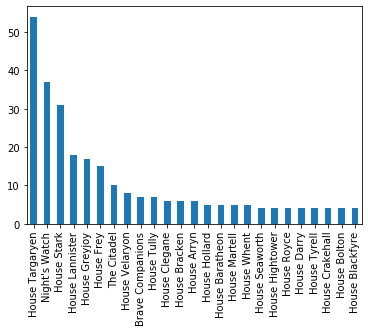

In [1181]:
casas_principales = dead_characters['house'].value_counts().head(26)
casas_principales[1:].plot.bar()